# Predicting Drug user or Non user based on LEGALH

## Introduction

### Authored by:
#### Team Name : ELITE

Team Members:Sindhura Alla,Medha Alla,Ravindra Kumar Velidandi,Sai Mithil Sagi,Venkata Saipavan Lahar Sudrosh Kumar Atchutha,Sanjana Thinderu,
### Description of the analysis

In this project, we are using a dataset containing drug consumption information from UCI's Machine Learning Repository.https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Our prediction task is to determine whether a person consumes LEGALH. We are using the input variables that include Age, Gender, Education, Country, Ethnicity and various scores that indicates personality traits like Nscore, Escore, Oscore, Ascore, Cscore, Impulsive, SS. The important factors here are both precision and recall. We think both precision and recall are equally important i.e false negatives and false positives should be less. Hence choice of f1-score for our analysis.

Objective is to use a Logistic Regression model to predict whether a person consumes LEGALH or not.



## Step 1 - Importing the required packages

In [83]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [84]:
random_seed = 2
np.random.seed(random_seed)

## Step 2 - Preliminary (Business) Problem Scoping

We are developing a binary classifier to identify if a given person in the dataset consumed LEGALH  or not. Our positive case will therefore Class0(Not Consumed).

## Step 3 - Loading, cleaning and preparing data

### Step 3.1-Loading the data from data source

In [85]:
drug_df = pd.read_csv("/Users/sindhura/Materials/USF/Data Mining/isms6136/Assignment3/Data/drug consumption data.csv")
drug_df.head(5)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


### Step 3.2- Data Exploration

In [86]:
print(drug_df.columns)
print(drug_df.describe())
print(drug_df.info())

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')
                ID         Age       Gender    Education      Country  \
count  1885.000000  1885.00000  1885.000000  1885.000000  1885.000000   
mean    945.294960     0.03461    -0.000256    -0.003806     0.355542   
std     545.167641     0.87836     0.482588     0.950078     0.700335   
min       1.000000    -0.95197    -0.482460    -2.435910    -0.570090   
25%     474.000000    -0.95197    -0.482460    -0.611130    -0.570090   
50%     946.000000    -0.07854    -0.482460    -0.059210     0.960820   
75%    1417.000000     0.49788     0.482460     0.454680     0.960820   
max    1888.000000     2.59171     0.482460   

Our findings from the data exploration indicate the the data requires a renaming/cleanup of column names. We also note that age,gender,education,country,ethnicity are categorical data but still have the numerical values. 

## Step 3.3 - Cleaning/transforming data (where necessary)

Cleaning up column names

In [87]:
# Modify column names
drug_df.columns = [col.strip().upper().replace(' ', '_') for col in drug_df.columns]
drug_df.columns

Index(['ID', 'AGE', 'GENDER', 'EDUCATION', 'COUNTRY', 'ETHNICITY', 'NSCORE',
       'ESCORE', 'OSCORE', 'ASCORE', 'CSCORE', 'IMPULSIVE', 'SS', 'ALCOHOL',
       'AMPHET', 'AMYL', 'BENZOS', 'CAFF', 'CANNABIS', 'CHOC', 'COKE', 'CRACK',
       'ECSTASY', 'HEROIN', 'KETAMINE', 'LEGALH', 'LSD', 'METH', 'MUSHROOMS',
       'NICOTINE', 'SEMER', 'VSA'],
      dtype='object')

#### Transforming LEGALH column
CL0, CL1, CL2, CL3, CL4, CL5, CL6 are different classes in original data for LEGALH consumption. 
For the purpose of this assignment, transforming different levels of classes 

In [88]:
drug_df['LEGALH'].unique()

array(['CL0', 'CL1', 'CL2', 'CL3', 'CL5', 'CL4', 'CL6'], dtype=object)

In [89]:
# Convert all LEGALH consumption classes to USED  and non LEGALH consumption class to Never_used
drug_df.loc[drug_df['LEGALH'] == 'CL0', 'LEGALH'] = 'Never_used'
drug_df.loc[drug_df['LEGALH'].isin(['CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']), 'LEGALH'] = 'USED'

In [90]:
drug_df['LEGALH'].unique()

array(['Never_used', 'USED'], dtype=object)

Dropping the unwanted columns

In [91]:
# Drop unwanted columns
drug_df = drug_df.drop(columns=['ID', 'ALCOHOL', 'AMPHET', 'AMYL', 'BENZOS', 'CAFF', 'CHOC', 'COKE', 'CRACK', 
                                'ECSTASY', 'KETAMINE', 'HEROIN', 'LSD', 'METH', 'MUSHROOMS', 'CANNABIS',
                                'NICOTINE', 'SEMER', 'VSA'])

In [92]:
drug_df.head(5)

,AGE,GENDER,EDUCATION,COUNTRY,ETHNICITY,NSCORE,ESCORE,OSCORE,ASCORE,CSCORE,IMPULSIVE,SS,LEGALH
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,Never_used
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,Never_used
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,Never_used
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,Never_used
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,USED


In [93]:
# Checking for null values
drug_df.isnull().sum()

AGE          0
GENDER       0
EDUCATION    0
COUNTRY      0
ETHNICITY    0
NSCORE       0
ESCORE       0
OSCORE       0
ASCORE       0
CSCORE       0
IMPULSIVE    0
SS           0
LEGALH       0
dtype: int64

In [94]:
# Categorizing LEGALH column
drug_df['LEGALH'] = drug_df['LEGALH'].astype('category')
drug_df.dtypes

AGE           float64
GENDER        float64
EDUCATION     float64
COUNTRY       float64
ETHNICITY     float64
NSCORE        float64
ESCORE        float64
OSCORE        float64
ASCORE        float64
CSCORE        float64
IMPULSIVE     float64
SS            float64
LEGALH       category
dtype: object

We are encoding this data using OrdinalEncoder for the LEGALH column

In [95]:
# Encode LEGALH column
le =LabelEncoder()
drug_df['LEGALH'] = le.fit_transform(drug_df['LEGALH'])
drug_df.head(20)

,AGE,GENDER,EDUCATION,COUNTRY,ETHNICITY,NSCORE,ESCORE,OSCORE,ASCORE,CSCORE,IMPULSIVE,SS,LEGALH
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
5,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
6,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,0
7,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,0
8,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,0
9,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,0


### 3.4 Checking distribution of classes

In [96]:
drug_df['LEGALH'].value_counts()

0    1094
1     791
Name: LEGALH, dtype: int64

## Step 4 - Split data into training and validation sets

#### Create the training set and the test set with a 70/30 split.

We've decided to utilize a training/test split of the data at 70% training and 30% testing. This percentage split ratio is inline with common practice for small to medium sized datasets, which this data represents. Moreover, we have decided not to do a three way data split, as we are only testing two models and we wish to allocated as much data as possible to training and validation steps.

In [97]:
# constructing datasets for analysis
target = 'LEGALH'
predictors = list(drug_df.columns)
predictors.remove(target)
X = drug_df[predictors]
y = drug_df[target]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random_seed)

In [99]:
logClassifier=LogisticRegression(random_state=random_seed)
_ = logClassifier.fit(X_train,y_train)

## Measure performance of model on validation data

In [100]:
THRESHOLD = 0.25
y_pred_dthreshold25 = np.where(logClassifier.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame({"predicted":y_pred_dthreshold25,"actual":y_test})

,predicted,actual
369,1,1
418,1,0
1602,0,0
1226,1,1
721,0,0
...,...,...
1534,1,1
1255,0,0
948,1,1
1853,1,1


In [101]:
y_pred = logClassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")
print("***********************")

[[272  55]
 [ 71 168]]
***********************
Recall Score:     0.703
Accuracy Score:   0.777
Precision Score:  0.753
F1 Score:         0.727
***********************


### Hyperparameter tuning for Logistic Regression model

In [111]:
param_grid = { 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty': ['l1', 'l2', 'elasticnet'], 
               'C': [100,5,4,3,2,1, 10, 1.0, 0.1, 0.01, 0.005, 0.001],
               'max_iter': [1000, 5000, 10000]}

### Grid search for best fit of Logistic Regression Model:

In [117]:
best_logClassifer = GridSearchCV(estimator=LogisticRegression(random_state=random_seed),
                                    scoring='f1', param_grid=param_grid,
                                    cv=5, verbose=0,  n_jobs = -1)
best_logClassifer = best_logClassifer.fit(X_train, y_train)

/Users/sindhura/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1440 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sindhura/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sindhura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sindhura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_lo

In [119]:
best_logClassifer.best_params_

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

###  Testing the performance of the selected parameters obtained by Grid search

In [120]:
y_pred = best_logClassifer.predict(X_test)
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")
print("***********************")

***********************
Recall Score:     0.707
Accuracy Score:   0.776
Precision Score:  0.748
F1 Score:         0.727
***********************


## ROC AUC

In [121]:
tps = []
fps = []
tns = []
fns = []  
precs = []
recls = []

tprs = []
fprs = []
thres = []
for threshold in np.arange(0.0, 1.1, 0.1):
    y_pred= best_logClassifer.predict_proba(X_test)[:,1]>=threshold
    m = confusion_matrix(y_test, y_pred)
    TP = m[1,1]
    TN = m[0,0]
    FP = m[0,1]
    FN = m[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    recall = TP / (TP+FN)
    precision = TP / (TP+FP)
    tps.append(TP)
    fps.append(FP)
    tns.append(TN)
    fns.append(FN)
    tprs.append(TPR)
    fprs.append(FPR)
    recls.append(recall)
    precs.append(precision)
    thres.append(str(round(threshold,2)))

print(y_test.value_counts())
df = pd.DataFrame(list(zip(thres, tps, fps, tns, fns, fprs, tprs, precs, recls)), columns=['Threshold', 'TP', 'FP', 'TN', 'FN', 'FPR', 'TPR', 'Precision', 'Recall'])
df

0    327
1    239
Name: LEGALH, dtype: int64


/var/folders/91/31_vfrrx4sxcnp9t598hlzfc0000gq/T/ipykernel_24994/1941625927.py:21: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP+FP)


,Threshold,TP,FP,TN,FN,FPR,TPR,Precision,Recall
0,0.0,239,327,0,0,1.000000,1.000000,0.422261,1.000000
1,0.1,234,224,103,5,0.685015,0.979079,0.510917,0.979079
2,0.2,223,145,182,16,0.443425,0.933054,0.605978,0.933054
3,0.3,207,94,233,32,0.287462,0.866109,0.687708,0.866109
4,0.4,190,74,253,49,0.226300,0.794979,0.719697,0.794979
5,0.5,169,57,270,70,0.174312,0.707113,0.747788,0.707113
6,0.6,148,42,285,91,0.128440,0.619247,0.778947,0.619247
7,0.7,127,29,298,112,0.088685,0.531381,0.814103,0.531381
8,0.8,85,15,312,154,0.045872,0.355649,0.850000,0.355649
9,0.9,29,3,324,210,0.009174,0.121339,0.906250,0.121339


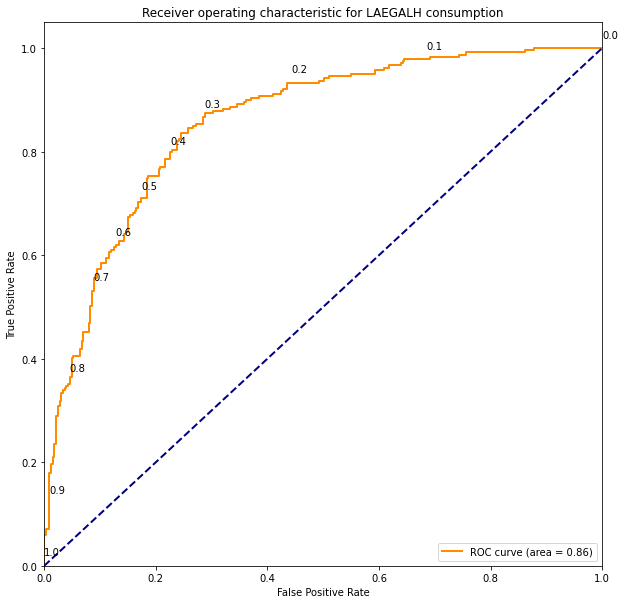

In [123]:
# compute tpr and fpr for for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, best_logClassifer.predict_proba(X_test)[:,1])

# compute roc auc
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for LAEGALH consumption')
plt.legend(loc="lower right")
for i in range(len(tprs)):
    plt.annotate(thres[i], (fprs[i], tprs[i] + 0.02))

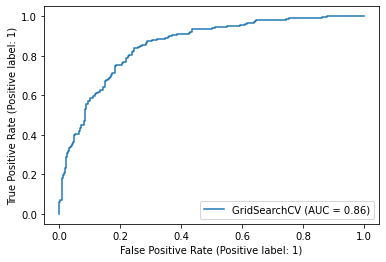

In [124]:
RocCurveDisplay.from_estimator(best_logClassifer, X_test, y_test)
plt.show()

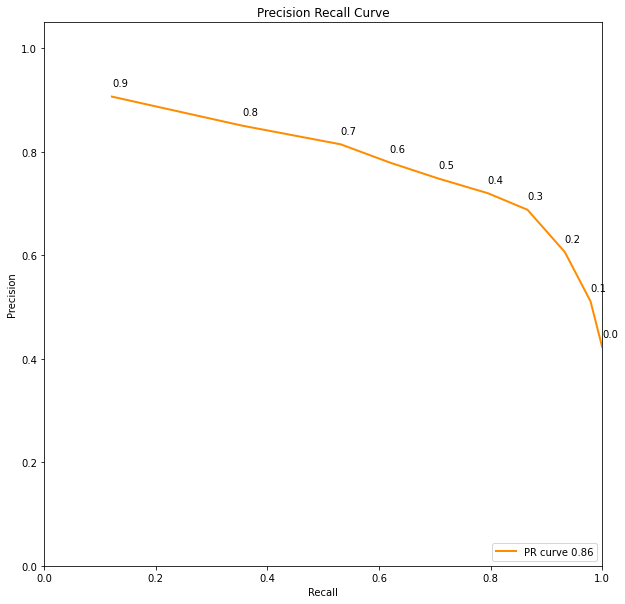

In [125]:
# compute pr auc
pr_auc = auc(recls, precs)

plt.figure(figsize=(10,10))
plt.plot(recls, precs, color='darkorange', lw=2, label=f'PR curve {roc_auc:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")

for i in range(len(tprs)):
    plt.annotate(thres[i], (recls[i], precs[i] + 0.02))

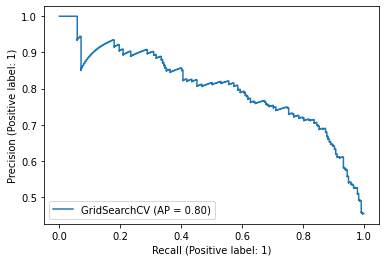

In [126]:
PrecisionRecallDisplay.from_estimator(best_logClassifer, X_test, y_test) 
plt.show()

## Step 5 - SUMMARIZING THE RESULTS:



## we have performed grid search for Logistic regression model and obtained the following results:

 ##### Recall Score:     0.715
 
 ##### Accuracy Score:   0.774
 
 ##### Precision Score:  0.740
 
 ### F1 Score:         0.728


 #### We have obtained ROC curve of value 0.86 which depicts the relationship between False positive rate and true positive rate.
   It is a very good sign of how well our logistic regression model classifies positive and negative outcomes at all possible cutoffs.
 ***********************
 #### We have obtained PR curve 0.80 which depicts relationship between precision and recall.
 As indicated above, our analysis assigns equal importance to precision and recall (f1-score). Having a score of PR curve 0.8 establishes the model is fitting
 well for all the probability thresholds
 ***********************
 #### We were able to make a good logistic regression model with the F1 score about 73% for binary classification of LEGALH prediction. ROC and PR curve indicates that model works well at different probability thresholds with higher scores.


